In [1]:
import tensorflow as tf

In [ ]:
const=tf.constant(34)
const

: 

In [2]:
const=tf.constant(34,dtype=tf.float32)
const

<tf.Tensor: shape=(), dtype=float32, numpy=34.0>

In [3]:
tf.ones((9,5))

<tf.Tensor: shape=(9, 5), dtype=float32, numpy=
array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]], dtype=float32)>

In [4]:
tf.zeros((3,3))

<tf.Tensor: shape=(3, 3), dtype=float32, numpy=
array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]], dtype=float32)>

In [5]:
const1=tf.constant([34,34,45])
const2=tf.constant([3,4,5])
tf.add(const1,const2)

<tf.Tensor: shape=(3,), dtype=int32, numpy=array([37, 38, 50])>

In [6]:
num=tf.random.normal((3,4
),stddev=1,mean=0
)

In [7]:
tf.reshape(num,[2,6])

<tf.Tensor: shape=(2, 6), dtype=float32, numpy=
array([[ 1.1491891 ,  0.40159926,  0.02170649,  0.5670367 ,  0.45951286,
         0.14079179],
       [-0.79949874, -0.8986559 ,  0.39726385, -0.6884105 , -0.751428  ,
         0.00257877]], dtype=float32)>

In [8]:
mat1=tf.constant([[3,4,5,6]])
mat2=tf.constant([[4,5,6,6]])

In [9]:
mat1.shape

TensorShape([1, 4])

In [10]:
tf.matmul(mat1,tf.transpose(mat2))

<tf.Tensor: shape=(1, 1), dtype=int32, numpy=array([[98]])>

In [11]:
tf.transpose(mat1)@mat2

<tf.Tensor: shape=(4, 4), dtype=int32, numpy=
array([[12, 15, 18, 18],
       [16, 20, 24, 24],
       [20, 25, 30, 30],
       [24, 30, 36, 36]])>

In [12]:
ragged=tf.ragged.constant([[23],[34]])
ragged

<tf.RaggedTensor [[23],
 [34]]>

In [13]:
ragged.shape

TensorShape([2, None])

In [14]:
ragged[0]

<tf.Tensor: shape=(1,), dtype=int32, numpy=array([23])>

In [15]:
mat1

<tf.Tensor: shape=(1, 4), dtype=int32, numpy=array([[3, 4, 5, 6]])>

In [16]:
tf.reduce_mean(mat1)

<tf.Tensor: shape=(), dtype=int32, numpy=4>

In [17]:
tf.math.squared_difference(mat1,mat2)

<tf.Tensor: shape=(1, 4), dtype=int32, numpy=array([[1, 1, 1, 0]])>

In [18]:
var1=tf.Variable(tf.ones((5,5)))
var1

<tf.Variable 'Variable:0' shape=(5, 5) dtype=float32, numpy=
array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]], dtype=float32)>

In [19]:
ckpt=tf.train.Checkpoint(var=var1)
savepath=ckpt.save("./var.ckpt")

In [20]:
var1=var1.assign(tf.zeros((5,5)))

In [21]:
var1

<tf.Variable 'UnreadVariable' shape=(5, 5) dtype=float32, numpy=
array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]], dtype=float32)>

In [22]:
ckpt.restore(savepath)

In [23]:
var1

<tf.Variable 'UnreadVariable' shape=(5, 5) dtype=float32, numpy=
array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]], dtype=float32)>

In [24]:
def fun(x,y):
    input_val=tf.multiply(x**3,6)+y**2
    return tf.reduce_mean(input_tensor=input_val)

In [25]:
func=tf.function(fun)

In [26]:
var1=tf.constant([3,4,5,5,6]*10000)
var2=tf.constant([3,4,7,8,9]*10000)

In [27]:
#var1

In [28]:
fun(var1,var2)# normal python function

<tf.Tensor: shape=(), dtype=int32, numpy=712>

In [29]:
func(var1,var2)#tensor function

<tf.Tensor: shape=(), dtype=int32, numpy=712>

In [30]:
def decorater_fn(input_fn):
    def decorater_in():
        print("++"*30)
        input_fn()
        print("++"*30)
    return decorater_in

In [31]:
def print_me():
    print("Nitin")
    

In [32]:
deco=decorater_fn(print_me)
deco()

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Nitin
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


In [33]:
@ decorater_fn
def print_my():
    print("Hello")
    print("World")
    print("Hello")
    

In [34]:
print_my()

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Hello
World
Hello
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


In [72]:
x=tf.random.normal(shape=(2,2))
y=tf.random.normal(shape=(2,2))
y

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[ 0.45232105,  0.01022792],
       [ 0.9139592 , -1.5183167 ]], dtype=float32)>

In [73]:
with tf.GradientTape() as tape:
    tape.watch(x)
    f=tf.square(x)+tf.square(y)
    dy_dx=tape.gradient(f,x)
    print(dy_dx)

tf.Tensor(
[[ 2.1466599 -1.6826967]
 [ 0.7795829 -3.6144123]], shape=(2, 2), dtype=float32)


In [101]:
with tf.GradientTape() as tape:
    tape.watch(y)
    f=tf.square(x)+tf.square(y)
    df_dy=tape.gradient(f,y)
    print(df_dy)

tf.Tensor(
[ 7.33179760e+00  1.22605610e+01 -1.58754826e+00  4.56234932e+00
  7.76758432e+00 -7.98811913e-02  1.04475546e+01 -4.90850258e+00
  4.45165491e+00  3.80066919e+00  7.22188473e+00  9.18049622e+00
 -5.76541233e+00  1.73806334e+00  4.24421310e-01  3.93731046e+00
  9.11209583e-01  6.74800396e+00  8.73886871e+00  4.65409136e+00
 -4.29419708e+00  1.58596535e+01 -1.75842714e+00  4.73453426e+00
 -2.57225895e+00  1.66701946e+01  7.87177610e+00  3.33696532e+00
  1.62446713e+00  1.17217064e-01  6.67239618e+00  5.22471333e+00
  2.37969851e+00  7.71201086e+00  3.24649334e-01  9.37347984e+00
 -1.27665234e+00  8.56239986e+00 -1.20579720e-01  2.35677958e+00
  4.89384270e+00  3.02112961e+00  5.63382673e+00 -5.73264694e+00
  1.05406647e+01  5.67637920e+00  4.60834122e+00  7.92676258e+00
  1.34823151e+01  6.78520584e+00  8.08498383e+00 -8.91187668e+00
 -1.05220871e+01 -1.59423256e+00  9.89479828e+00  9.50439262e+00
  5.45058060e+00 -2.08026600e+00  1.02822390e+01 -1.21693468e+00
  7.66296387e-

In [102]:
2*x

<tf.Tensor: shape=(1000,), dtype=float32, numpy=
array([ 1.1105992e+00,  2.7535203e+00, -1.8625160e+00,  1.8744983e-01,
        1.2558614e+00, -1.3599604e+00,  2.1491849e+00, -2.9695008e+00,
        1.5055163e-01, -6.6443592e-02,  1.0739615e+00,  1.7268320e+00,
       -3.2551374e+00, -7.5397885e-01, -1.1918596e+00, -2.0896522e-02,
       -1.0295968e+00,  9.1600132e-01,  1.5796231e+00,  2.1803048e-01,
       -2.7647324e+00,  3.9532180e+00, -1.9194757e+00,  2.4484482e-01,
       -2.1907530e+00,  4.2233982e+00,  1.2905921e+00, -2.2101153e-01,
       -7.9184431e-01, -1.2942610e+00,  8.9079875e-01,  4.0823784e-01,
       -5.4010051e-01,  1.2373370e+00, -1.2251168e+00,  1.7911599e+00,
       -1.7588841e+00,  1.5207999e+00, -1.3735266e+00, -5.4774010e-01,
        2.9794759e-01, -3.2629010e-01,  5.4460895e-01, -3.2442157e+00,
        2.1802216e+00,  5.5879313e-01,  2.0278037e-01,  1.3089209e+00,
        3.1607718e+00,  9.2840189e-01,  1.3616614e+00, -4.3039589e+00,
       -4.8406959e+00, -1.86

In [103]:
with tf.GradientTape() as tape:
    tape.watch([y,x])
    f=tf.square(x)+tf.square(y)
    df_dy,df_dx=tape.gradient(f,[y,x])
    print(df_dy)
    print(df_dy)

tf.Tensor(
[ 7.33179760e+00  1.22605610e+01 -1.58754826e+00  4.56234932e+00
  7.76758432e+00 -7.98811913e-02  1.04475546e+01 -4.90850258e+00
  4.45165491e+00  3.80066919e+00  7.22188473e+00  9.18049622e+00
 -5.76541233e+00  1.73806334e+00  4.24421310e-01  3.93731046e+00
  9.11209583e-01  6.74800396e+00  8.73886871e+00  4.65409136e+00
 -4.29419708e+00  1.58596535e+01 -1.75842714e+00  4.73453426e+00
 -2.57225895e+00  1.66701946e+01  7.87177610e+00  3.33696532e+00
  1.62446713e+00  1.17217064e-01  6.67239618e+00  5.22471333e+00
  2.37969851e+00  7.71201086e+00  3.24649334e-01  9.37347984e+00
 -1.27665234e+00  8.56239986e+00 -1.20579720e-01  2.35677958e+00
  4.89384270e+00  3.02112961e+00  5.63382673e+00 -5.73264694e+00
  1.05406647e+01  5.67637920e+00  4.60834122e+00  7.92676258e+00
  1.34823151e+01  6.78520584e+00  8.08498383e+00 -8.91187668e+00
 -1.05220871e+01 -1.59423256e+00  9.89479828e+00  9.50439262e+00
  5.45058060e+00 -2.08026600e+00  1.02822390e+01 -1.21693468e+00
  7.66296387e-

In [104]:
with tf.GradientTape() as tape:
    tape.watch(y)
    tape.watch(x)
    f=tf.sqrt(tf.square(x)+tf.square(y))
    df_dy,df_dx=tape.gradient(f,[y,x])
    print(df_dy)
    print(df_dy)

tf.Tensor(
[ 0.9887211   0.97569674 -0.64869386  0.9991571   0.9871806  -0.05863681
  0.97949    -0.8556109   0.99942863  0.99984723  0.98912287  0.9827656
 -0.870794    0.91739804  0.335465    0.99998593  0.66274214  0.99091226
  0.9840529   0.9989045  -0.84080625  0.97031057 -0.6754966   0.99866545
 -0.7613061   0.9693735   0.9868249   0.9978139   0.8988946   0.09019763
  0.99120563  0.9969614   0.9751984   0.98737234  0.25615335  0.9822279
 -0.5874082   0.98459023 -0.08745207  0.97403973  0.99815184  0.99421823
  0.99536014 -0.870301    0.9792716   0.99518955  0.9990333   0.98663926
  0.97360265  0.99076855  0.98611236 -0.9004854  -0.9084729  -0.64982283
  0.9808471   0.9818715   0.99608827 -0.71625894  0.9798849  -0.5733516
  0.57941777  0.9995282   0.9843578  -0.533389    0.480716    0.971904
 -0.8754165   0.96739453  0.97435117 -0.90271777 -0.38389534  0.9937992
  0.99233603  0.9990762   0.9737964   0.9739552   0.16113767  0.9773106
 -0.8190934   0.99477035  0.9878466   0.9715569

In [105]:
True_w=3.0
True_b=2.0
x=tf.random.normal(shape=[1000])
noise=tf.random.normal(shape=[1000])
y=x*True_w+True_b
y_noise=y+noise

In [106]:
import matplotlib.pyplot as plt

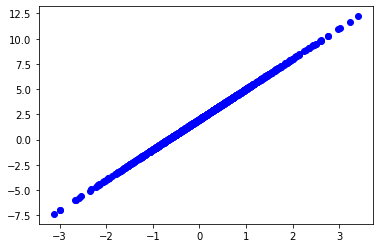

In [107]:
plt.scatter(x,y,c='b')
plt.show()

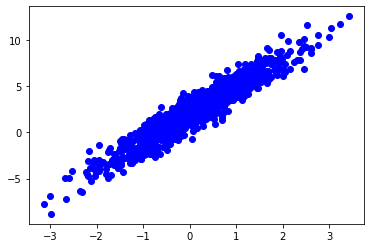

In [108]:
plt.scatter(x,y_noise,c='b')
plt.show()

In [153]:
class Mymodel(tf.Module):
    def __init__(self,**kwargs):
        super().__init__(**kwargs)
        self.w=tf.Variable(4.0)
        self.b=tf.Variable(0.0)
    def __call__(self,x):
        return self.w*x+self.b


In [154]:
model=Mymodel()

In [155]:
model(9)

<tf.Tensor: shape=(), dtype=float32, numpy=36.0>

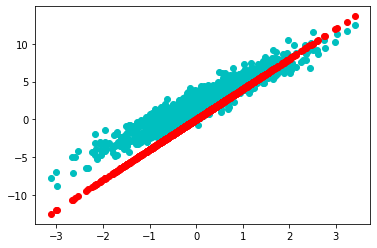

In [156]:
plt.scatter(x,y_noise,c='c')
plt.scatter(x,model(x),c='r')
plt.show()

In [157]:
def MSE_loss(actual,pred):
    error=actual-pred
    squared_error=tf.square(error)
    mse=tf.reduce_mean(error)
    return mse


In [144]:
def train(model,x,y,learning_rate):
    with tf.GradientTape() as tape:
        current_loss=MSE_loss(y,model(x))
        dw_dx,db_dx=tape.gradient(current_loss,[model.w,model.b])
        model.w.assign_sub(learning_rate*dw_dx)
        model.b.assign_sub(learning_rate*db_dx)
        

In [158]:
wb=[]
bs=[]
epochs=100
init_loss=MSE_loss(y,model(x))
print(f" initial loss {init_loss}")
w=model.w.numpy()
b=model.b.numpy()
print(f"initial weights {w} and biased {b}")


 initial loss 1.9109431505203247
initial weights 4.0 and biased 0.0


In [159]:
for epoch in range(epochs):
    train(model,x,y,0.01)
    loss=MSE_loss(y,model(x))
    # if loss >0.01 and loss < 0.12:
    #     break
    wb.append(model.w.numpy())
    bs.append(model.b.numpy())
    
    print(f"epoch  {epoch} loss = {loss} n weight{wb[-1]} biased {bs[-1]}" )


epoch  0 loss = 1.900863766670227 n weight4.000890731811523 biased 0.009999992325901985
epoch  1 loss = 1.8907843828201294 n weight4.001781463623047 biased 0.01999998465180397
epoch  2 loss = 1.8807052373886108 n weight4.00267219543457 biased 0.029999976977705956
epoch  3 loss = 1.8706259727478027 n weight4.003562927246094 biased 0.03999996930360794
epoch  4 loss = 1.860546588897705 n weight4.004453659057617 biased 0.04999995976686478
epoch  5 loss = 1.8504670858383179 n weight4.005344390869141 biased 0.05999995023012161
epoch  6 loss = 1.8403878211975098 n weight4.006235122680664 biased 0.06999994069337845
epoch  7 loss = 1.8303085565567017 n weight4.0071258544921875 biased 0.07999993115663528
epoch  8 loss = 1.8202292919158936 n weight4.008016586303711 biased 0.08999992161989212
epoch  9 loss = 1.8101500272750854 n weight4.008907318115234 biased 0.09999991208314896
epoch  10 loss = 1.8000705242156982 n weight4.009798049926758 biased 0.10999990254640579
epoch  11 loss = 1.789991497993

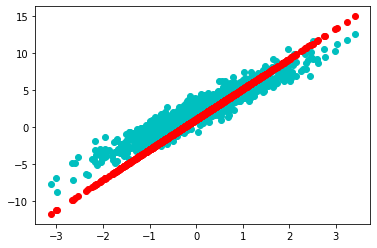

In [160]:
plt.scatter(x,y_noise,c='c')
plt.scatter(x,model(x),c='r')
plt.show()

In [148]:
model.b,model.w

(<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=1.7899984>,
 <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=4.159441>)

In [149]:
model.b

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=1.7899984>

In [150]:
True_b,True_w

(2.0, 3.0)